In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [5]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [6]:
X_val, y_val = X_train[50000:], y_train[50000:]
X_train, y_train = X_train[:50000], y_train[:50000]

In [7]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

c:\Users\vaibh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",save_best_only=True,mode="min",verbose=1)

In [10]:
es = EarlyStopping(monitor="val_loss",
                   patience=5,restore_best_weights=True)

In [11]:
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.5,patience=2,verbose=1)

In [12]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,batch_size=64,verbose=1,callbacks=[checkpoint,es,lr_scheduler])

Epoch 1/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7558 - loss: 1.1956
Epoch 1: val_loss improved from None to 0.44211, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8591 - loss: 0.8273 - val_accuracy: 0.9550 - val_loss: 0.4421 - learning_rate: 0.0010
Epoch 2/50
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9279 - loss: 0.5189
Epoch 2: val_loss improved from 0.44211 to 0.34663, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9298 - loss: 0.4965 - val_accuracy: 0.9625 - val_loss: 0.3466 - learning_rate: 0.0010
Epoch 3/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9402 - loss: 0.4170
Epoch 3: val_loss improved from 0.34663 to 0.29218, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9400 - loss: 0.4052 - val_accuracy: 0.9685 - val_loss: 0.2922 - learning_rate: 0.0010
Epoch 4/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9434 - loss: 0.3702
Epoch 4: val_loss improved from 0.29218 to 0.26288, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9436 - loss: 0.3662 - val_accuracy: 0.9704 - val_loss: 0.2629 - learning_rate: 0.0010
Epoch 5/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9464 - loss: 0.3413
Epoch 5: val_loss improved from 0.26288 to 0.24961, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9467 - loss: 0.3368 - val_accuracy: 0.9711 - val_loss: 0.2496 - learning_rate: 0.0010
Epoch 6/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9507 - loss: 0.3203
Epoch 6: val_loss did not improve from 0.24961
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9507 - loss: 0.3183 - val_accuracy: 0.9682 - val_loss: 0.2516 - learning_rate: 0.0010
Epoch 7/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9537 - loss: 0.3009
Epoch 7: val_loss improved from 0.24961 to 0.24086, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9496 - loss: 0.3122 - val_accuracy: 0.9704 - val_loss: 0.2409 - learning_rate: 0.0010
Epoch 8/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9517 - loss: 0.3038
Epoch 8: val_loss did not improve from 0.24086
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9511 - loss: 0.3083 - val_accuracy: 0.9706 - val_loss: 0.2435 - learning_rate: 0.0010
Epoch 9/50
767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9507 - loss: 0.3036
Epoch 9: val_loss improved from 0.24086 to 0.22542, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9500 - loss: 0.3064 - val_accuracy: 0.9734 - val_loss: 0.2254 - learning_rate: 0.0010
Epoch 10/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9520 - loss: 0.2971
Epoch 10: val_loss did not improve from 0.22542
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9514 - loss: 0.2990 - val_accuracy: 0.9709 - val_loss: 0.2259 - learning_rate: 0.0010
Epoch 11/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9547 - loss: 0.2828
Epoch 11: val_loss did not improve from 0.22542

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9527 - loss: 0.2870 - val_accuracy: 0.9688 - val_loss: 0.2312 - learning_rate: 0.0010
Epoch 12/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9623 - loss: 0.2501
Epoch 12: val_loss improved from 0.22542 to 0.19074, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9638 - loss: 0.2425 - val_accuracy: 0.9780 - val_loss: 0.1907 - learning_rate: 5.0000e-04
Epoch 13/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9639 - loss: 0.2290
Epoch 13: val_loss improved from 0.19074 to 0.18114, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9637 - loss: 0.2257 - val_accuracy: 0.9771 - val_loss: 0.1811 - learning_rate: 5.0000e-04
Epoch 14/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9669 - loss: 0.2095
Epoch 14: val_loss improved from 0.18114 to 0.17167, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9656 - loss: 0.2110 - val_accuracy: 0.9759 - val_loss: 0.1717 - learning_rate: 5.0000e-04
Epoch 15/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.1930
Epoch 15: val_loss did not improve from 0.17167
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9671 - loss: 0.2000 - val_accuracy: 0.9765 - val_loss: 0.1752 - learning_rate: 5.0000e-04
Epoch 16/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.1942
Epoch 16: val_loss improved from 0.17167 to 0.16266, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9658 - loss: 0.1998 - val_accuracy: 0.9780 - val_loss: 0.1627 - learning_rate: 5.0000e-04
Epoch 17/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9657 - loss: 0.1981
Epoch 17: val_loss did not improve from 0.16266
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9660 - loss: 0.1979 - val_accuracy: 0.9769 - val_loss: 0.1673 - learning_rate: 5.0000e-04
Epoch 18/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9686 - loss: 0.1862
Epoch 18: val_loss did not improve from 0.16266

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9665 - loss: 0.1930 - val_accuracy: 0.9777 - val_loss: 0.1640 - learning_rate: 5.0000e-04
Epoch 19/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9717 - loss: 0.1783
Epoch 19: val_loss improved from 0.16266 to 0.14659, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9725 - loss: 0.1725 - val_accuracy: 0.9809 - val_loss: 0.1466 - learning_rate: 2.5000e-04
Epoch 20/50
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.1576
Epoch 20: val_loss improved from 0.14659 to 0.14038, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9738 - loss: 0.1609 - val_accuracy: 0.9823 - val_loss: 0.1404 - learning_rate: 2.5000e-04
Epoch 21/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.1532
Epoch 21: val_loss improved from 0.14038 to 0.13579, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9749 - loss: 0.1530 - val_accuracy: 0.9819 - val_loss: 0.1358 - learning_rate: 2.5000e-04
Epoch 22/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9786 - loss: 0.1430
Epoch 22: val_loss did not improve from 0.13579
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9769 - loss: 0.1450 - val_accuracy: 0.9812 - val_loss: 0.1369 - learning_rate: 2.5000e-04
Epoch 23/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.1420
Epoch 23: val_loss improved from 0.13579 to 0.13193, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9766 - loss: 0.1406 - val_accuracy: 0.9808 - val_loss: 0.1319 - learning_rate: 2.5000e-04
Epoch 24/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.1381
Epoch 24: val_loss did not improve from 0.13193
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.1386 - val_accuracy: 0.9789 - val_loss: 0.1364 - learning_rate: 2.5000e-04
Epoch 25/50
766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9778 - loss: 0.1358
Epoch 25: val_loss improved from 0.13193 to 0.12976, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.1381 - val_accuracy: 0.9802 - val_loss: 0.1298 - learning_rate: 2.5000e-04
Epoch 26/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9772 - loss: 0.1325
Epoch 26: val_loss did not improve from 0.12976
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9774 - loss: 0.1316 - val_accuracy: 0.9810 - val_loss: 0.1322 - learning_rate: 2.5000e-04
Epoch 27/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9779 - loss: 0.1281
Epoch 27: val_loss improved from 0.12976 to 0.12851, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9777 - loss: 0.1302 - val_accuracy: 0.9810 - val_loss: 0.1285 - learning_rate: 2.5000e-04
Epoch 28/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9765 - loss: 0.1313
Epoch 28: val_loss did not improve from 0.12851
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9766 - loss: 0.1310 - val_accuracy: 0.9799 - val_loss: 0.1308 - learning_rate: 2.5000e-04
Epoch 29/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9773 - loss: 0.1299
Epoch 29: val_loss improved from 0.12851 to 0.12520, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9772 - loss: 0.1282 - val_accuracy: 0.9812 - val_loss: 0.1252 - learning_rate: 2.5000e-04
Epoch 30/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9779 - loss: 0.1299
Epoch 30: val_loss did not improve from 0.12520
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9786 - loss: 0.1271 - val_accuracy: 0.9804 - val_loss: 0.1275 - learning_rate: 2.5000e-04
Epoch 31/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9790 - loss: 0.1257
Epoch 31: val_loss did not improve from 0.12520

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9783 - loss: 0.1265 - val_accuracy: 0.9812 - val_loss: 0.1297 - learning_rate: 2.5000e-04
Epoch 32/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9812 - loss: 0.1167
Epoch 32: val_loss improved from 0.12520 to 0.11947, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9825 - loss: 0.1120 - val_accuracy: 0.9819 - val_loss: 0.1195 - learning_rate: 1.2500e-04
Epoch 33/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.1030
Epoch 33: val_loss improved from 0.11947 to 0.11932, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9829 - loss: 0.1039 - val_accuracy: 0.9825 - val_loss: 0.1193 - learning_rate: 1.2500e-04
Epoch 34/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.1012
Epoch 34: val_loss improved from 0.11932 to 0.11800, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9838 - loss: 0.1022 - val_accuracy: 0.9827 - val_loss: 0.1180 - learning_rate: 1.2500e-04
Epoch 35/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0997
Epoch 35: val_loss improved from 0.11800 to 0.11448, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9840 - loss: 0.0990 - val_accuracy: 0.9826 - val_loss: 0.1145 - learning_rate: 1.2500e-04
Epoch 36/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0929
Epoch 36: val_loss did not improve from 0.11448
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9848 - loss: 0.0945 - val_accuracy: 0.9821 - val_loss: 0.1164 - learning_rate: 1.2500e-04
Epoch 37/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0984
Epoch 37: val_loss improved from 0.11448 to 0.11073, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9838 - loss: 0.1003 - val_accuracy: 0.9828 - val_loss: 0.1107 - learning_rate: 1.2500e-04
Epoch 38/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0887
Epoch 38: val_loss did not improve from 0.11073
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9856 - loss: 0.0915 - val_accuracy: 0.9824 - val_loss: 0.1131 - learning_rate: 1.2500e-04
Epoch 39/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9848 - loss: 0.0924
Epoch 39: val_loss did not improve from 0.11073

Epoch 39: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9843 - loss: 0.0947 - val_accuracy: 0.9828 - val_loss: 0.1139 - learning_rate: 1.2500e-04
Epoch 40/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9861 - loss: 0.0863
Epoch 40: val_loss did not improve from 0.11073
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0844 - val_ac

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9887 - loss: 0.0803 - val_accuracy: 0.9836 - val_loss: 0.1091 - learning_rate: 6.2500e-05
Epoch 42/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9895 - loss: 0.0800
Epoch 42: val_loss did not improve from 0.10909
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9888 - loss: 0.0805 - val_accuracy: 0.9833 - val_loss: 0.1097 - learning_rate: 6.2500e-05
Epoch 43/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.0771
Epoch 43: val_loss did not improve from 0.10909

Epoch 43: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9882 - loss: 0.0774 - val_accuracy: 0.9824 - val_loss: 0.1097 - learning_rate: 6.2500e-05
Epoch 44/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0741
Epoch 44: val_loss improved from 0.10909 to 0.10685, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0732 - val_accuracy: 0.9839 - val_loss: 0.1068 - learning_rate: 3.1250e-05
Epoch 45/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9906 - loss: 0.0709
Epoch 45: val_loss improved from 0.10685 to 0.10550, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9903 - loss: 0.0719 - val_accuracy: 0.9841 - val_loss: 0.1055 - learning_rate: 3.1250e-05
Epoch 46/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0744
Epoch 46: val_loss did not improve from 0.10550
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9897 - loss: 0.0729 - val_accuracy: 0.9839 - val_loss: 0.1060 - learning_rate: 3.1250e-05
Epoch 47/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9908 - loss: 0.0711
Epoch 47: val_loss did not improve from 0.10550

Epoch 47: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9901 - loss: 0.0713 - val_accuracy: 0.9839 - val_loss: 0.1064 - learning_rate: 3.1250e-05
Epoch 48/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0707
Epoch 48: val_loss did not improve from 0.10550
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9904 - loss: 0.0692 - val_

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9899 - loss: 0.0694 - val_accuracy: 0.9841 - val_loss: 0.1047 - learning_rate: 1.5625e-05
Epoch 50/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0663
Epoch 50: val_loss improved from 0.10469 to 0.10404, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9910 - loss: 0.0670 - val_accuracy: 0.9841 - val_loss: 0.1040 - learning_rate: 1.5625e-05


In [13]:
loss,acc=model.evaluate(X_test,y_test,verbose=2)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

313/313 - 0s - 2ms/step - accuracy: 0.9845 - loss: 0.0981
Test Accuracy: 0.9845, Test Loss: 0.0981


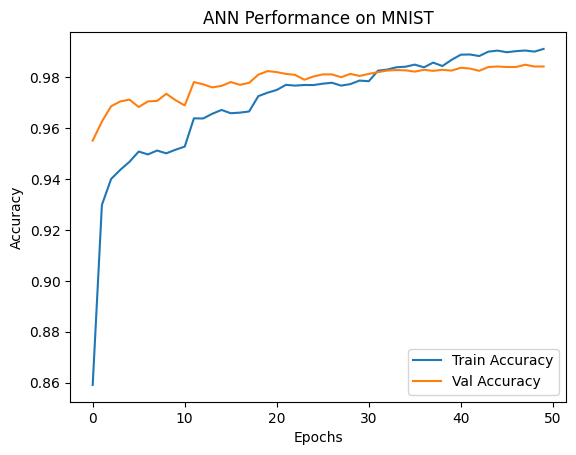

In [14]:
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ANN Performance on MNIST")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


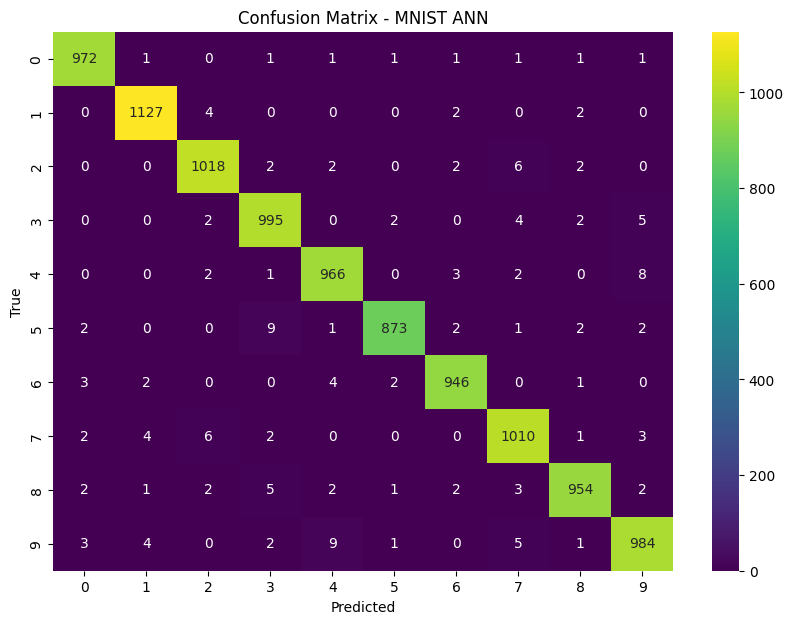

In [15]:
y_pred = model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)

cm=confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MNIST ANN")
plt.show()

In [16]:
print("\nClassificatipon Report: \n")
print(classification_report(y_test, y_pred_classes))


Classificatipon Report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



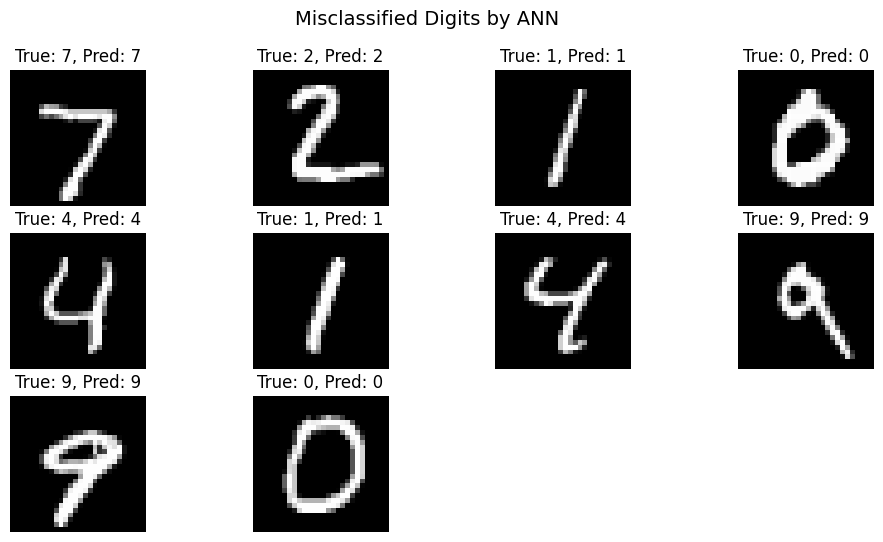

In [17]:
misclassified_idx= np.where(y_pred_classes == y_test)[0]

plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx[:10]):
  plt.subplot(3,4,i+1)
  plt.imshow(X_test[idx],cmap="gray")
  plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
  plt.axis("off")
plt.suptitle("Misclassified Digits by ANN", fontsize=14)
plt.show()